In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
from clustering import (
    get_demand_daily,
    get_supply,
    get_supply_multiple_years,
    Data_one_year,
    get_demand_monthly,
    mergeall,
    Cluster_data,
)
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd

In [3]:
# PV complete dataframe

filepath_pv_list = [
    os.path.join(
        os.path.abspath(""),
        "data",
        "supply_data_formatted",
        "PV",
        f"PV_baalbeck_{year}.csv",
    )
    for year in range(2015, 2019)
]

pv_df = get_supply_multiple_years(*filepath_pv_list)

new_rows = pd.DataFrame(
    [
        {"datetime": datetime(2015, 1, 1, 1, 0), "electricity": 0},
        {"datetime": datetime(2015, 1, 1, 0, 0), "electricity": 0},
    ]
)
# pv_df
pv_df = pd.concat([new_rows, pv_df], ignore_index=True)

# Sort the DataFrame by datetime
pv_df.sort_values("datetime", inplace=True)

# Reset the index
pv_df.reset_index(drop=True, inplace=True)

In [4]:
# wind complete dataframe

filepath_wind_list = [
    os.path.join(
        os.path.abspath(""),
        "data",
        "supply_data_formatted",
        "Wind",
        f"Wind_Akkar_{year}.csv",
    )
    for year in range(2015, 2019)
]

wind_df = get_supply_multiple_years(*filepath_wind_list)

new_rows = pd.DataFrame(
    [
        {"datetime": datetime(2015, 1, 1, 1, 0), "electricity": 0.637},
        {"datetime": datetime(2015, 1, 1, 0, 0), "electricity": 0.621},
    ]
)  # 2016 values
# pv_df
wind_df = pd.concat([new_rows, wind_df], ignore_index=True)

# Sort the DataFrame by datetime
wind_df.sort_values("datetime", inplace=True)

# Reset the index
wind_df.reset_index(drop=True, inplace=True)

In [5]:
daylight_saving_start_end_dates = [
    "2015-03-29",
    "2016-03-27",
    "2017-03-26",
    "2018-03-25",
    "2015-10-24",
    "2016-10-29",
    "2017-10-28",
    "2018-10-27",
]
days_to_remove = pd.to_datetime(daylight_saving_start_end_dates)

In [6]:
pv_df = pv_df[~pv_df.datetime.dt.date.isin(days_to_remove.date)]
wind_df = wind_df[~wind_df.datetime.dt.date.isin(days_to_remove.date)]

In [7]:
# 2015
demand_df = get_demand_daily()
pv_df_year = pv_df[pv_df.datetime.dt.year == 2015].copy()
wind_df_year = wind_df[wind_df.datetime.dt.year == 2015].copy()


data_2015 = Data_one_year(
    demand_df, wind_df_year, pv_df_year, demand_df["demand"].max()
)

data_2015.write_main_df()

In [8]:
clusters_2015 = Cluster_data(data_2015.cluster_input, 4)
np.savetxt("2015_clusters_results", clusters_2015.centroids.T, delimiter=",")

In [28]:
clusters_2015.cluster_weights

[77, 246, 23, 17]

In [9]:
# 2016
filepath_demand = os.path.join(
    os.path.abspath(""), "data", "demand_data_formatted", "Average-Demand-2016.xlsx"
)
demand_df = get_demand_monthly(filepath_demand)

pv_df_year = pv_df[pv_df.datetime.dt.year == 2016].copy()
wind_df_year = wind_df[wind_df.datetime.dt.year == 2016].copy()


data_2016 = Data_one_year(
    demand_df, wind_df_year, pv_df_year, demand_df["demand"].max()
)
data_2016.write_main_df()

In [10]:
clusters_2016 = Cluster_data(data_2016.cluster_input, 4)
np.savetxt("2016_clusters_results", clusters_2016.centroids.T, delimiter=",")

In [11]:
clusters_2016.cluster_weights

[129, 22, 148, 65]

In [12]:
# 2017
filepath_demand = os.path.join(
    os.path.abspath(""), "data", "demand_data_formatted", "Average-Demand-2017.xlsx"
)
demand_df = get_demand_monthly(filepath_demand)

pv_df_year = pv_df[pv_df.datetime.dt.year == 2017].copy()
wind_df_year = wind_df[wind_df.datetime.dt.year == 2017].copy()


data_2017 = Data_one_year(
    demand_df, wind_df_year, pv_df_year, demand_df["demand"].max()
)
data_2017.write_main_df()

In [13]:
clusters_2017 = Cluster_data(data_2017.cluster_input, 4)
np.savetxt("2017_clusters_results", clusters_2017.centroids.T, delimiter=",")

In [29]:
clusters_2017.cluster_weights

[124, 30, 59, 150]

In [15]:
# 2018
filepath_demand = os.path.join(
    os.path.abspath(""), "data", "demand_data_formatted", "Average-Demand-2018.xlsx"
)
demand_df = get_demand_monthly(filepath_demand)

pv_df_year = pv_df[pv_df.datetime.dt.year == 2018].copy()
wind_df_year = wind_df[wind_df.datetime.dt.year == 2018].copy()


data_2018 = Data_one_year(
    demand_df, wind_df_year, pv_df_year, demand_df["demand"].max()
)
data_2018.write_main_df()

In [16]:
clusters_2018 = Cluster_data(data_2018.cluster_input, 4)
np.savetxt("2018_clusters_results", clusters_2018.centroids.T, delimiter=",")

In [17]:
clusters_2018.cluster_weights

[72, 201, 61, 29]

In [18]:
# %%
# all dataframes
all_data_df = mergeall(
    data_2015.cluster_input,
    data_2016.cluster_input,
    data_2017.cluster_input,
    data_2018.cluster_input,
)

In [19]:
clusters_all = Cluster_data(all_data_df, 4)
np.savetxt("all_clusters_results", clusters_all.centroids.T, delimiter=",")

In [20]:
clusters_all.cluster_weights

[267, 488, 90, 608]

In [21]:
inertia_list = []
for n in range(1, 10):
    inertia_list.append(Cluster_data(all_data_df, n).inertia)

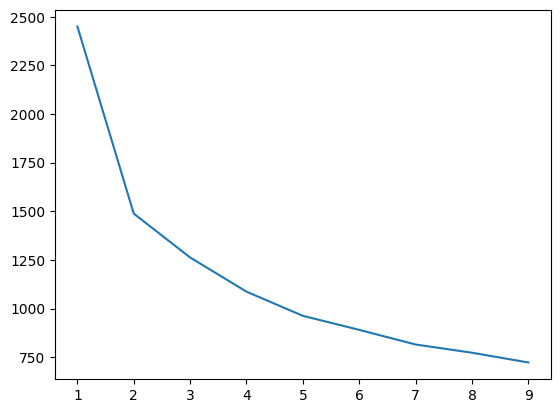

In [22]:
plt.plot(range(1, 10), inertia_list)
plt.savefig("inertia.png")
plt.show()